In [1]:
%matplotlib inline
import import_ipynb
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
from SV_channel import SV_channel
from HybridMassiveMIMO import HybridMassiveMIMO

importing Jupyter notebook from SV_channel.ipynb
Covariance matrix:
 [[ 1.165 +0.j     -0.0575+0.2464j  0.392 +0.861j   0.1495+0.28j  ]
 [-0.0575-0.2464j  1.0575+0.j      0.0286-0.378j   0.3648+0.7055j]
 [ 0.392 -0.861j   0.0286+0.378j   1.1549+0.j     -0.1635+0.1647j]
 [ 0.1495-0.28j    0.3648-0.7055j -0.1635-0.1647j  1.0804+0.j    ]]

Matrix rank: 4
importing Jupyter notebook from HybridMassiveMIMO.ipynb
Channel capacity estimation for SNR 70 dB: 11.198521824187482 bps/Hz


In [3]:
np.random.seed(79)

qam16_gray = {"0000": np.complex128(-3 + 3j), "0001": np.complex128(-3 + 1j), "0010": np.complex128(-3 - 3j), \
              "0011": np.complex128(-3 - 1j), "0100": np.complex128(-1 + 3j), "0101": np.complex128(-1 + 1j), \
              "0110": np.complex128(-1 - 3j), "0111": np.complex128(-1 - 1j), "1000": np.complex128(3 + 3j), \
              "1001": np.complex128(3 + 1j), "1010": np.complex128(3 - 3j), "1011": np.complex128(3 - 1j), \
              "1100": np.complex128(1 + 3j), "1101": np.complex128(1 + 1j), "1110": np.complex128(1 - 3j), \
              "1111": np.complex128(1 - 1j)}

N_tx = (4, 4)
N_rx = (2, 2)
N_rf = 4
model = HybridMassiveMIMO(N_s = 4,
                     N_rf = N_rf, 
                     N_tx = N_tx[0] * N_tx[1], 
                     N_rx = N_rx[0] * N_rx[1],
                     N_ofdm = 10,
                     N_ifft = 512,
                     N_c = 450,
                     N_gi = 64,
                     mapping = qam16_gray)

# Random matrix for analog beamforming
F_rf = np.random.normal(0, 1, size = (N_tx[0] * N_tx[1], N_rf)) + 1j * np.random.normal(0, 1, size = (N_tx[0] * N_tx[1], N_rf))

SNR_dBHz = np.arange(*(40, 70))
N = 10
sv_channel = SV_channel(cl = 10, 
                    rays = 2, 
                    d_phi = 7.5, 
                    d_thetta = 7.5,
                    a_r = N_rx,
                    a_t = N_tx)

H = sv_channel.compute_channel()

C = np.zeros(SNR_dBHz.shape, dtype = np.float64)
for j in range(len(SNR_dBHz)):
    for i in range(N):
        C_buf, _ = model.compute_C(F_rf, H, SNR_dBHz[j])
        C[j] += C_buf
        
C /= N

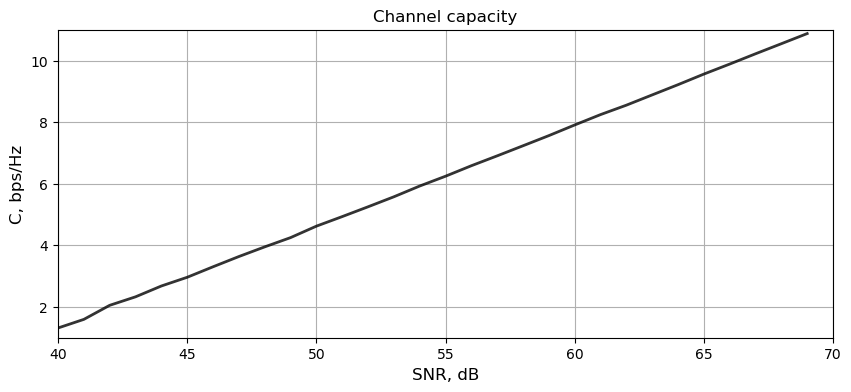

In [4]:
figsize(10, 4)
plt.plot(np.arange(40, 70), C, color = 'k', alpha = 0.8, lw = 2.0)
plt.xlim(40, 70)
plt.ylim(1, 11)
plt.xlabel('SNR, dB', fontsize = 12)
plt.ylabel('C, bps/Hz', fontsize = 12)
plt.title('Channel capacity', fontsize = 12)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.grid()
plt.show()